In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Datos Extras: Cantidad de población por Estado

Utilizaremos un dataset descargado desde el siguiente link: https://datosmacro.expansion.com/demografia/poblacion/usa-estados para tener una visualización rapida de la densidad y poblacion de cada estado de Estados Unidos

Una vez obtenida la información tomaremos el top 5 de estados con mayor población para filtrar los datasets por estos 5 estados.

In [81]:
'''Descargamos un dataset con la densidad y población de los estados de Estados Unidos en 2021'''

# Abrimos el dataset
densidad = pd.read_csv("datasets/DensidadPobl.csv", sep=';', encoding='Latin1', thousands='.')

densidad.head()

,Estados,Densidad,Poblacion
0,Alaska,0,732673
1,Alabama,37,5039877
2,Arkansas,22,3025891
3,Arizona,25,7276316
4,California,93,39237836


In [82]:
# Verificamos cuantos nulos hay
densidad.isnull().sum()

Estados      0
Densidad     0
Poblacion    0
dtype: int64

In [83]:
# Verificamos la cantidad de datos duplicados
densidad.duplicated().sum()

0

In [84]:
densidad = densidad.sort_values('Poblacion', ascending=False)

In [85]:
densidad.head()

,Estados,Densidad,Poblacion
4,California,93,39237836
42,Texas,42,29527941
8,Florida,128,21781128
33,Nueva York,140,19835913
37,Pensilvania,109,12964056


In [86]:
top5= densidad.head()

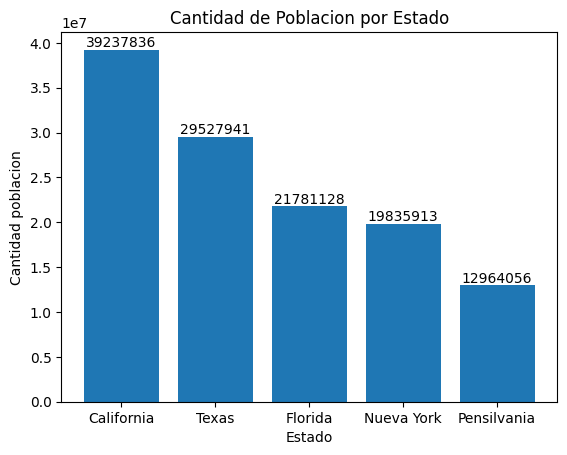

In [88]:
plt.bar(top5['Estados'], top5['Poblacion'])

# Agregar anotaciones con los valores de Densidad
for i, v in enumerate(top5['Poblacion']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de Poblacion por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad poblacion')

# Mostrar el gráfico
plt.show()